In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time

from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score

In [2]:
## Boston Marathon data for 2014

bm2014 = pd.read_csv('https://raw.githubusercontent.com/llimllib/bostonmarathon/master/results/2014/results.csv',
                    na_values='-')

In [3]:
bm2014.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [4]:
bm2014.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

In [5]:
len(bm2014)

31984

In [6]:
bm2014.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
count,31934.000000,31984.000000,31768.000000,31984.000000,31984.000000,31984.000000,31950.000000,31984.000000,31984.000000,31944.000000,31932.000000,31912.000000,31933.000000,31945.000000
mean,51.799275,1932.563032,133.612055,42.407079,242.997314,8051.044741,196.857605,15939.587825,9.275658,164.571219,25.755559,111.664566,105.711669,229.001490
std,8.965513,1715.228694,25.596958,11.316496,52.300431,4754.005626,41.979107,9232.978224,1.992486,33.953683,4.327830,21.061188,19.780525,49.159902
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000
25%,45.400000,610.000000,115.470000,33.000000,205.527500,3972.000000,167.122500,7943.750000,7.850000,140.670000,22.650000,96.845000,91.750000,193.820000
50%,50.330000,1425.000000,128.875000,42.000000,232.370000,7970.000000,188.170000,15939.500000,8.870000,157.730000,25.080000,107.830000,102.150000,218.850000
75%,57.170000,2611.000000,147.735000,50.000000,273.235000,11968.000000,220.170000,23935.250000,10.430000,182.880000,28.470000,123.070000,116.520000,257.450000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000


In [7]:
bm2014.describe(include='object')

,name,gender,bib,ctz,state,country,city
count,31984,31984,31984,1244,29408,31984,31983
unique,31915,2,31984,84,68,78,5934
top,"Baynes, Chris",M,17984,GBR,MA,USA,Boston
freq,2,17617,1,171,7587,27233,1034


In [8]:
bm2014.iloc[:5, :11]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,35k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,71.40
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,116.37
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,67.42
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,116.37
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,67.83


In [9]:
bm2014.iloc[:5, 11:]

,overall,pace,state,30k,5k,half,20k,country,city,40k
0,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [10]:
## Some are wheelchair races. Probably ones with bibs starting with W. Maybe more.
## Let's see if we can cluster wheelchair users together

In [11]:
bm2014[bm2014['bib'].str.contains('W')]

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
6,17.65,"Hug, Marcel E.",4,47.67,M,28,84.65,W4,4,NaN,...,4,3.23,NaN,58.60,8.38,39.72,37.65,SUI,Neuenkirch,79.83
8,17.12,"Soejima, Masazumi",3,46.37,M,43,81.23,W6,3,NaN,...,3,3.10,NaN,57.03,8.00,38.60,36.60,JPN,Isahaya,76.70
12,18.13,"Lemeunier, Denis Sr.",11,49.17,M,49,86.95,W7,11,NaN,...,11,3.32,NaN,60.85,8.40,41.18,39.03,FRA,Taule,82.17
14,17.12,"Cassidy, Josh R.",13,48.88,M,29,87.40,W8,13,NaN,...,13,3.35,ON,60.82,8.02,40.20,38.02,CAN,Port Elgin,82.38
16,17.13,"Madera, Jordi",5,47.45,M,34,84.70,W9,5,NaN,...,5,3.23,NaN,58.73,8.02,39.12,36.98,ESP,Les Franquesas,79.92
18,18.17,"Hamerlak, Tomasz",7,49.15,M,38,84.88,W10,7,NaN,...,7,3.25,NaN,59.92,8.67,41.20,39.05,POL,Bystra,80.18
23,18.17,"Botello Jimenez, Rafael",12,49.15,M,35,86.95,W12,12,NaN,...,12,3.32,NaN,60.87,8.68,41.20,39.05,ESP,Manlleu,82.17


## Try clustering to find wheelchair racers
#### KMeans

In [12]:
bm2014_times = bm2014.copy()
bm2014_times.drop(['name', 'division', 'gender', 'age', 'bib', 'genderdiv', 'overall',
                'ctz', 'state', 'country', 'city'], axis=1, inplace=True)
bm2014_times.dropna(inplace=True)
bm2014_bib = bm2014.loc[bm2014.index.isin(bm2014_times.index), ['bib']]
bib = np.where(bm2014_bib['bib'].str.contains('W'), 1, 0)

In [13]:
bm2014_times.head()

,10k,25k,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72


In [14]:
## Normalize by feature, not by sample

times_norm = normalize(bm2014_times, axis=0)

In [15]:
times_norm

array([[0.0018648 , 0.00197018, 0.00193822, ..., 0.00197496, 0.00197696,
        0.0019387 ],
       [0.00349771, 0.00340679, 0.00315912, ..., 0.00345419, 0.00345667,
        0.00318417],
       [0.00178428, 0.00189289, 0.00183249, ..., 0.00189093, 0.00189558,
        0.00183433],
       ...,
       [0.00633409, 0.00648955, 0.00641146, ..., 0.00649221, 0.00647594,
        0.00641896],
       [0.00684404, 0.00693591, 0.00688277, ..., 0.00681341, 0.00682092,
        0.00689068],
       [0.00575758, 0.00558031, 0.00519055, ..., 0.00567478, 0.00567255,
        0.00521809]])

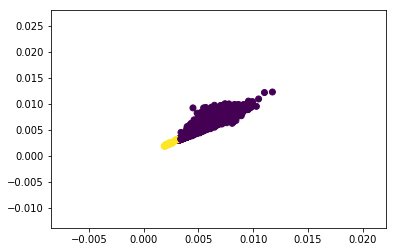

In [16]:
plt.scatter(times_norm[:, 7], times_norm[:, 2], c=bib)
plt.show()

In [17]:
len(bib) - sum(bib)

31596

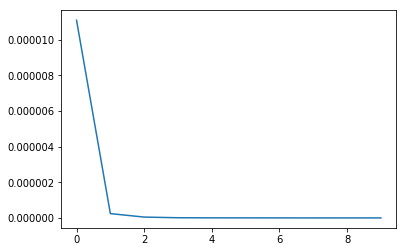

In [79]:
pca_t = PCA(n_components=10)
times_pca = pca_t.fit_transform(times_norm)

plt.plot(pca_t.explained_variance_)

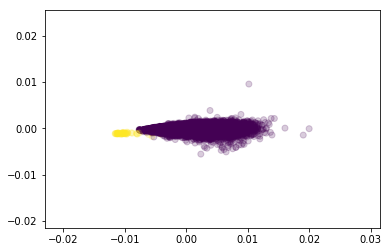

In [19]:
## Plot actual wheelchair racers - hard to spot!

plt.scatter(times_pca[:, 0], times_pca[:, 1], c=bib, alpha=.2)
plt.show()

In [20]:
results = pd.DataFrame()
results['actual'] = bib

for n_clust in range(2, 15):
    bib_model = KMeans(n_clusters=n_clust, random_state=55).fit(times_norm)
    bib_pred = bib_model.predict(times_norm)
    results['cluster_' + str(n_clust)] = bib_pred
    print(pd.crosstab(results['cluster_{}'.format(n_clust)], results['actual']), '\n')


actual         0   1
cluster_2           
0          21254  53
1          10342   0 

actual         0   1
cluster_3           
0          13750  53
1           5737   0
2          12109   0 

actual         0   1
cluster_4           
0           8779  53
1           3348   0
2          12062   0
3           7407   0 

actual         0   1
cluster_5           
0           6456  53
1           5088   0
2           2481   0
3           7544   0
4          10027   0 

actual        0   1
cluster_6          
0          7258   0
1          3559   0
2          5388  53
3          8574   0
4          5143   0
5          1674   0 

actual        0   1
cluster_7          
0          4099   0
1          6455   0
2          1343   0
3          2814   0
4          5698   0
5          3800  53
6          7387   0 

actual        0   1
cluster_8          
0           933   0
1          5790   0
2          7100   0
3          2171   0
4          2040  53
5          4480   0
6          5550   0
7     

In [21]:
## Manually pick out the best clusters to group into 0 or 1

results['cluster_2a'] = np.where(results['cluster_2'] == 0, 1, 0)
results['cluster_3a'] = np.where(results['cluster_3'] == 0, 1, 0)
results['cluster_4a'] = np.where(results['cluster_4'] == 0, 1, 0)
results['cluster_5a'] = np.where(results['cluster_5'] == 0, 1, 0)
results['cluster_6a'] = np.where(results['cluster_6'] == 2, 1, 0)
results['cluster_7a'] = np.where(results['cluster_7'] == 5, 1, 0)
results['cluster_8a'] = np.where(results['cluster_8'] == 4, 1, 0)
results['cluster_9a'] = np.where(results['cluster_9'] == 5, 1, 0)
results['cluster_10a'] = np.where(results['cluster_10'] == 8, 1, 0)
results['cluster_11a'] = np.where(results['cluster_11'] == 9, 1, 0)
results['cluster_12a'] = np.where(results['cluster_12'] == 7, 1, 0)
results['cluster_13a'] = np.where(results['cluster_13'] == 11, 1, 0)
results['cluster_14a'] = np.where(results['cluster_14'] == 13, 1, 0)

actual          0   1
cluster_2a           
0           10342   0
1           21254  53
ARI: -0.0017110165315886198 



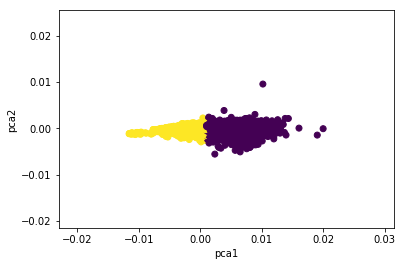

actual          0   1
cluster_3a           
0           17846   0
1           13750  53
ARI: 0.0009919123361675913 



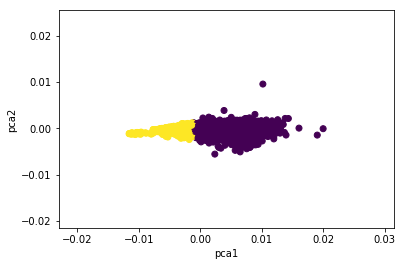

actual          0   1
cluster_4a           
0           22817   0
1            8779  53
ARI: 0.005305736149423628 



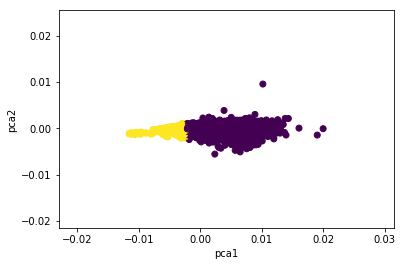

actual          0   1
cluster_5a           
0           25140   0
1            6456  53
ARI: 0.00956376148803989 



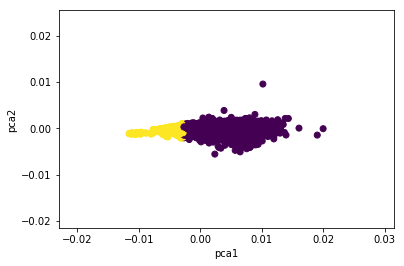

actual          0   1
cluster_6a           
0           26208   0
1            5388  53
ARI: 0.012729883174312073 



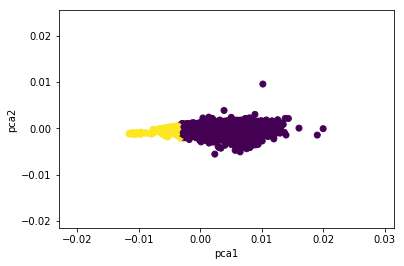

actual          0   1
cluster_7a           
0           27796   0
1            3800  53
ARI: 0.020638874193423643 



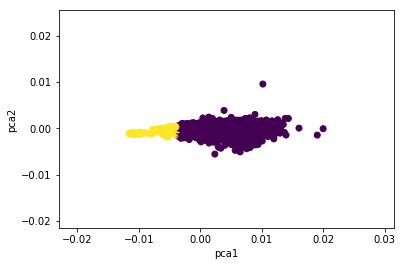

actual          0   1
cluster_8a           
0           29556   0
1            2040  53
ARI: 0.04307945795247156 



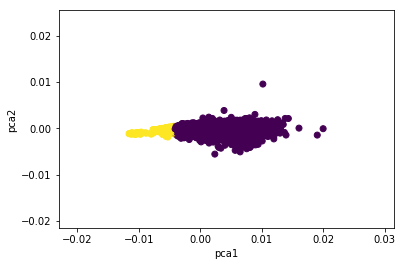

actual          0   1
cluster_9a           
0           30144   1
1            1452  52
ARI: 0.0606875433662348 



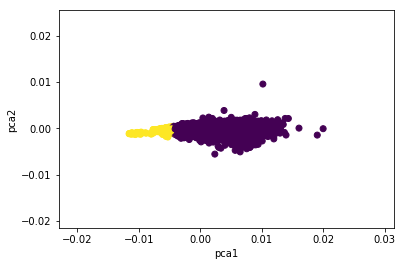

actual           0   1
cluster_10a           
0            30495   1
1             1101  52
ARI: 0.08028500180718708 



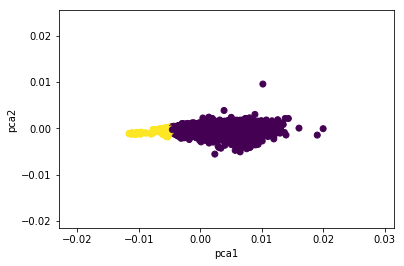

actual           0   1
cluster_11a           
0            31578   5
1               18  48
ARI: 0.8057747652292224 



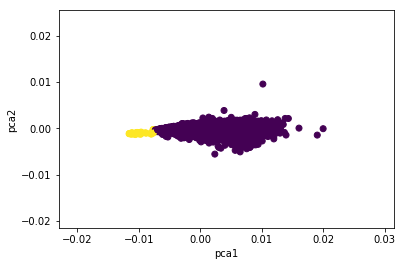

actual           0   1
cluster_12a           
0            31596   6
1                0  47
ARI: 0.939726645952568 



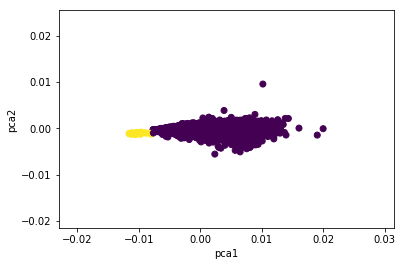

actual           0   1
cluster_13a           
0            31582   5
1               14  48
ARI: 0.8339809276634655 



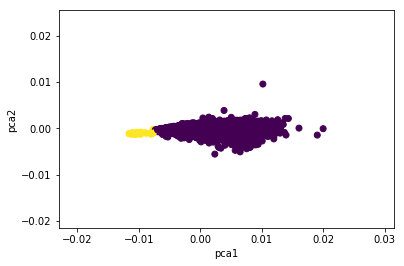

actual           0   1
cluster_14a           
0            31596   6
1                0  47
ARI: 0.939726645952568 



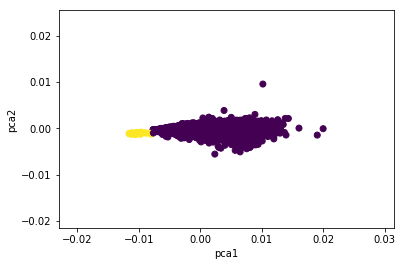

In [22]:
for clust in range(2, 15):
    print(pd.crosstab(results['cluster_{}a'.format(clust)], results['actual']))
    print('ARI:', adjusted_rand_score(results['cluster_{}a'.format(clust)], results['actual']), '\n')
    plt.scatter(times_pca[:, 0], times_pca[:, 1], c=results['cluster_{}a'.format(clust)])
    plt.xlabel('pca1')
    plt.ylabel('pca2')
    plt.show()    

actual         0   1
cluster_2           
0          21254  53
1          10342   0
ARI: -0.0017110165315886198 



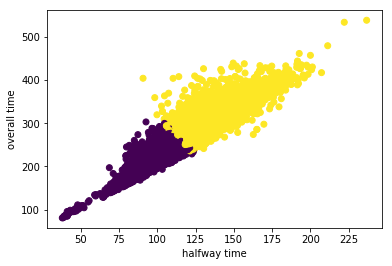

actual         0   1
cluster_3           
0          13750  53
1           5737   0
2          12109   0
ARI: -0.0006982829011080216 



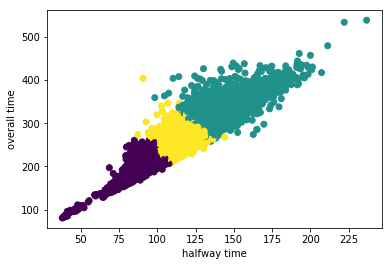

actual         0   1
cluster_4           
0           8779  53
1           3348   0
2          12062   0
3           7407   0
ARI: 0.00010570549494893403 



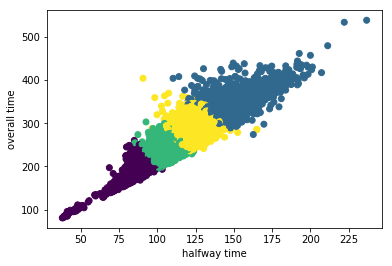

actual         0   1
cluster_5           
0           6456  53
1           5088   0
2           2481   0
3           7544   0
4          10027   0
ARI: 0.00023657849032460664 



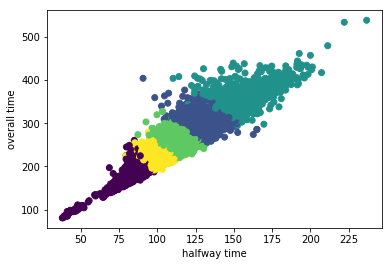

actual        0   1
cluster_6          
0          7258   0
1          3559   0
2          5388  53
3          8574   0
4          5143   0
5          1674   0
ARI: 0.00022415045685915936 



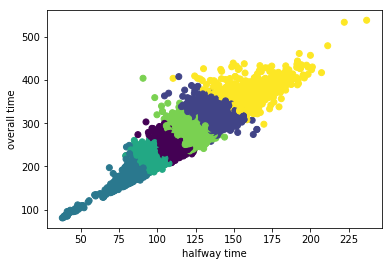

actual        0   1
cluster_7          
0          4099   0
1          6455   0
2          1343   0
3          2814   0
4          5698   0
5          3800  53
6          7387   0
ARI: 0.00039974299647541886 



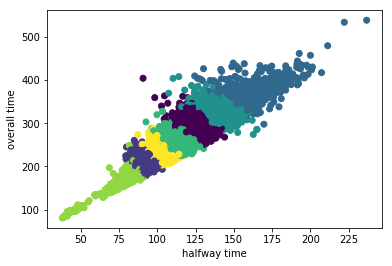

actual        0   1
cluster_8          
0           933   0
1          5790   0
2          7100   0
3          2171   0
4          2040  53
5          4480   0
6          5550   0
7          3532   0
ARI: 0.0007349217288786795 



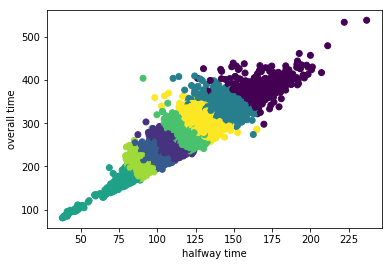

actual        0   1
cluster_9          
0          5782   0
1           757   0
2          3651   0
3          4664   1
4          4707   0
5          1452  52
6          5757   0
7          2919   0
8          1907   0
ARI: 0.0007059725848305813 



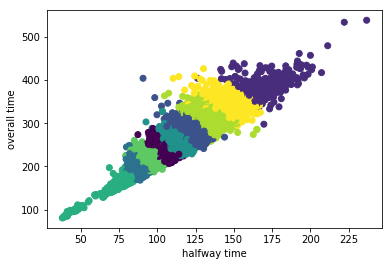

actual         0   1
cluster_10          
0           4029   1
1           3021   0
2           4637   0
3           1630   0
4           3723   0
5           5614   0
6           2290   0
7            679   0
8           1101  52
9           4872   0
ARI: 0.0006813122855364419 



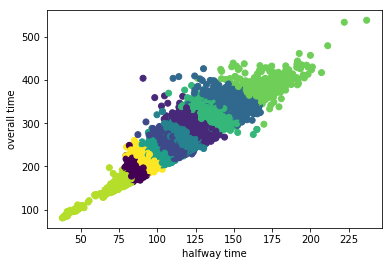

actual         0   1
cluster_11          
0           3656   0
1           4757   0
2           1643   0
3           5406   0
4            682   0
5           2306   0
6           1679   4
7           4455   0
8           3016   0
9             18  48
10          3978   1
ARI: 0.0008713159757986458 



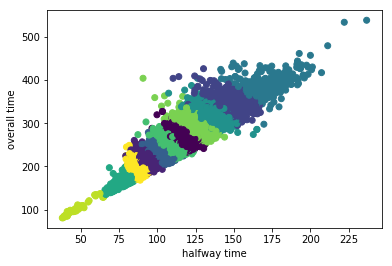

actual         0   1
cluster_12          
0           3659   1
1           2877   0
2           4907   0
3           1485   0
4            632   0
5           4241   0
6           2032   0
7              0  47
8           4162   0
9           3593   0
10          1478   5
11          2530   0
ARI: 0.0007716551127672908 



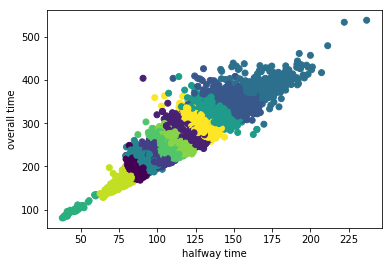

actual         0   1
cluster_13          
0           3470   1
1           2060   0
2           3580   0
3           1009   0
4           4677   0
5           1439   4
6           2917   0
7           4114   0
8           1490   0
9            443   0
10          2450   0
11            14  48
12          3933   0
ARI: 0.0007277084058567213 



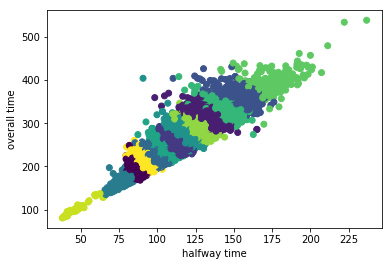

actual         0   1
cluster_14          
0           4762   0
1           2207   0
2            942   0
3           3502   1
4           3589   0
5           2935   0
6           1420   5
7           3979   0
8           1385   0
9            384   0
10          1667   0
11          4133   0
12           691   0
13             0  47
ARI: 0.0007168180668522619 



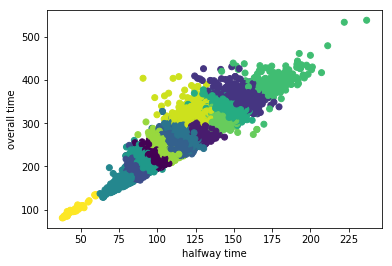

In [23]:
## Replot plotting halfway time versus overall time

for clust in range(2, 15):
    print(pd.crosstab(results['cluster_{}'.format(clust)], results['actual']))
    print('ARI:', adjusted_rand_score(results['cluster_{}'.format(clust)], results['actual']), '\n')
    plt.scatter(bm2014_times['half'], bm2014_times['official'], c=results['cluster_{}'.format(clust)])
    plt.xlabel('halfway time')
    plt.ylabel('overall time')
    plt.show() 

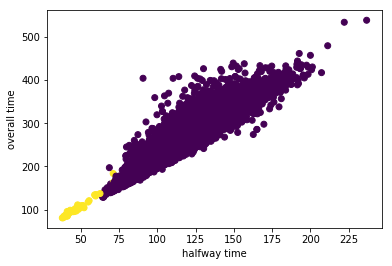

actual         0   1
cluster_2           
0          21271  53
1          10325   0 



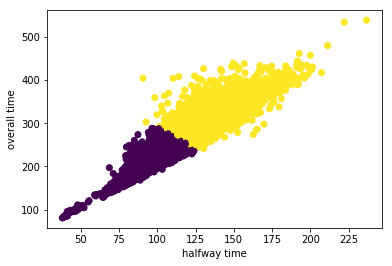

actual         0   1
cluster_3           
0          13700  53
1           5715   0
2          12181   0 



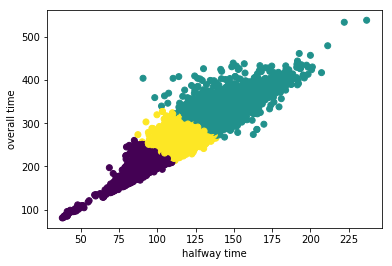

actual         0   1
cluster_4           
0          11925   0
1           3424   0
2           8884  53
3           7363   0 



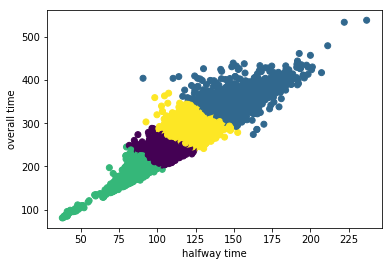

actual         0   1
cluster_5           
0          10259   0
1           5016   0
2           7523   0
3           2407   0
4           6391  53 



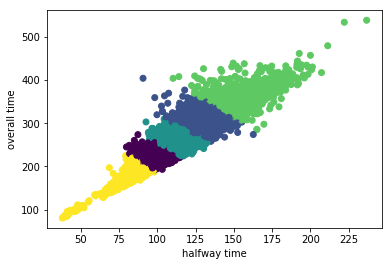

actual        0   1
cluster_6          
0          5353   0
1          8319   0
2          1759   0
3          5134  53
4          7376   0
5          3655   0 



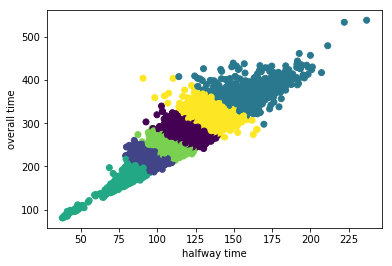

actual        0   1
cluster_7          
0          7380   0
1          4205   0
2          2872   0
3          6479   0
4          5713   0
5          1231   0
6          3716  53 



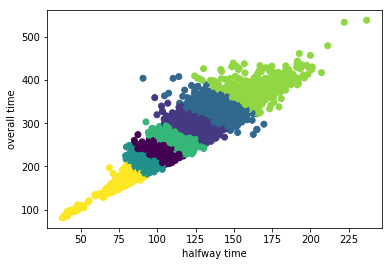

actual        0   1
cluster_8          
0          4395   0
1          2228   0
2          5438   1
3           927   0
4          6991   0
5          2380  52
6          3430   0
7          5807   0 



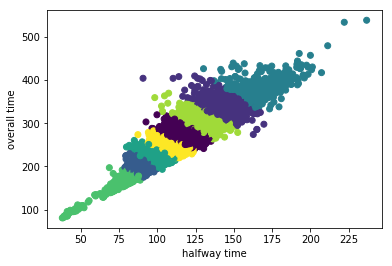

actual        0   1
cluster_9          
0           814   0
1          5728   0
2          4567   1
3          2889   0
4          3726   0
5          1909   0
6          5788   0
7          1489  52
8          4686   0 



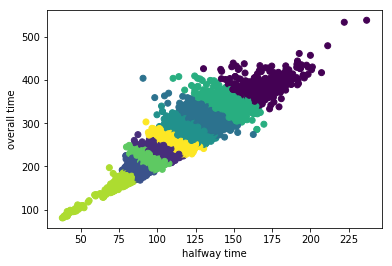

actual         0   1
cluster_10          
0           3635   0
1           5073   0
2           2241   0
3           5699   0
4            662   0
5           1567   0
6           4075   1
7           2987   0
8           4561   0
9           1096  52 



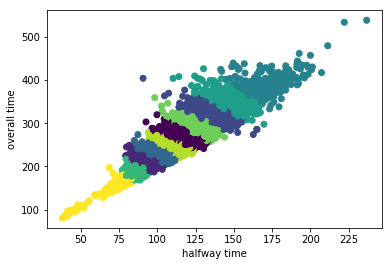

actual         0   1
cluster_11          
0           3205   0
1           3285   1
2           2146   0
3           4862   0
4            661   0
5           2695   0
6           1540   0
7           4518   0
8           3813   0
9           4029   0
10           842  52 



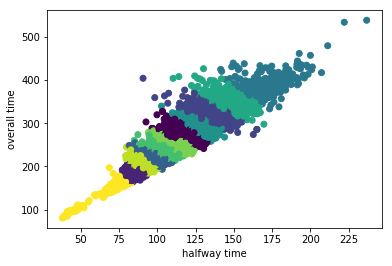

actual         0   1
cluster_12          
0           4108   0
1           2032   0
2           4268   0
3           2972   0
4           4717   0
5           1604   4
6           3558   0
7           1485   0
8           2543   0
9           3629   1
10           660   0
11            20  48 



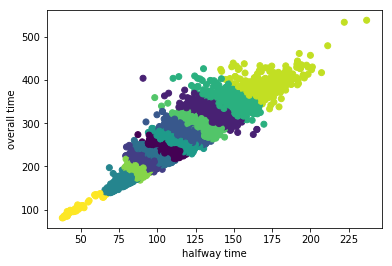

actual         0   1
cluster_13          
0           5032   0
1            593   0
2           1880   4
3            516   0
4           3395   0
5           3935   1
6           1138   0
7           2007   0
8           4133   0
9           1480   0
10            20  48
11          2766   0
12          4701   0 



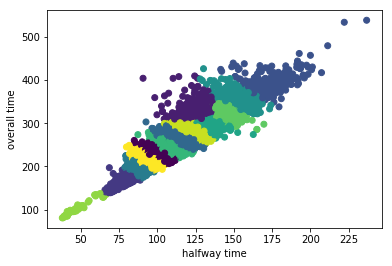

actual         0   1
cluster_14          
0           3284   1
1           2971   0
2           1779   0
3           4524   0
4            993   0
5           1329   5
6           2557   0
7           1435   0
8           3863   0
9            615   0
10          3584   0
11             0  47
12          4208   0
13           454   0 



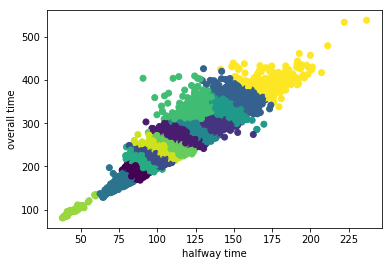

In [78]:
## Try clustering just on halfway and overall time

half_official = pd.DataFrame({
    'half': bm2014_times['half'],
    'official': bm2014_times['official']
})

half_off_norm = normalize(half_official, axis=0)

results2 = pd.DataFrame()
results2['actual'] = bib

plt.scatter(half_official['half'], half_official['official'], c=results2['actual'])
plt.xlabel('halfway time')
plt.ylabel('overall time')
plt.show()

for n_clust in range(2, 15):
    bib_model = KMeans(n_clusters=n_clust, random_state=55).fit(half_off_norm)
    bib_pred = bib_model.predict(half_off_norm)
    results2['cluster_' + str(n_clust)] = bib_pred
    print(pd.crosstab(results2['cluster_{}'.format(n_clust)], results2['actual']), '\n')
    plt.scatter(half_official['half'], half_official['official'], c=results2['cluster_{}'.format(n_clust)])
    plt.xlabel('halfway time')
    plt.ylabel('overall time')
    plt.show()

#### MeanShift

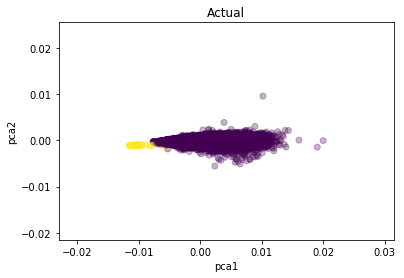

actual              0   1
bandwidth_0.05           
0               31596  53 



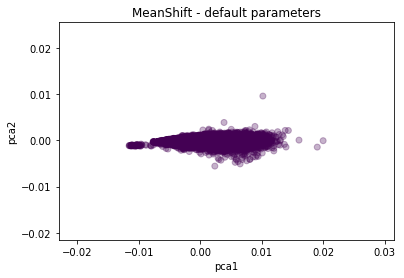

actual             0   1
bandwidth_0.1           
0              31596  53 



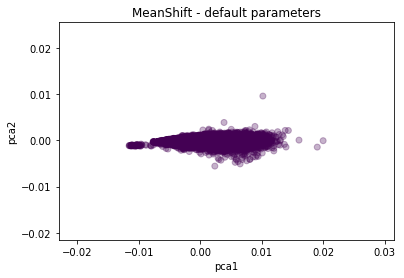

actual                             0   1
bandwidth_0.15000000000000002           
0                              31596  53 



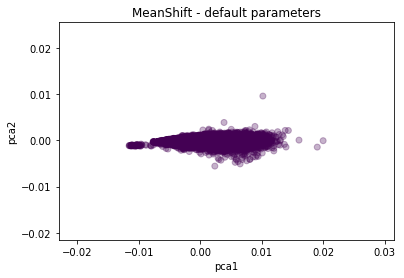

actual             0   1
bandwidth_0.2           
0              31596  53 



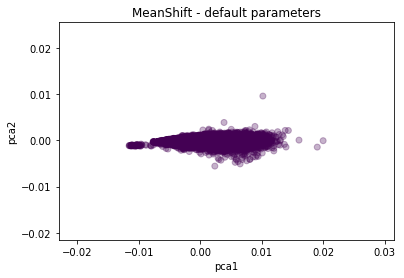

In [26]:
## Using all numeric variables

results3 = pd.DataFrame()
results3['actual'] = bib

plt.scatter(times_pca[:, 0], times_pca[:, 1], c=results3['actual'], alpha=.3)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('Actual')
plt.show()

## Default
for bw in np.arange(0.05, 0.2, 0.05):
    bib_model = MeanShift(bandwidth=bw, bin_seeding=True).fit(times_norm)
    bib_pred = bib_model.predict(times_norm)
    results3['bandwidth_{}'.format(bw)] = bib_pred
    print(pd.crosstab(results3['bandwidth_{}'.format(bw)], results3['actual']), '\n')
    plt.scatter(times_pca[:, 0], times_pca[:, 1], c=results3['bandwidth_{}'.format(bw)], alpha=.3)
    plt.xlabel('pca1')
    plt.ylabel('pca2')
    plt.title('MeanShift - default parameters')
    plt.show()


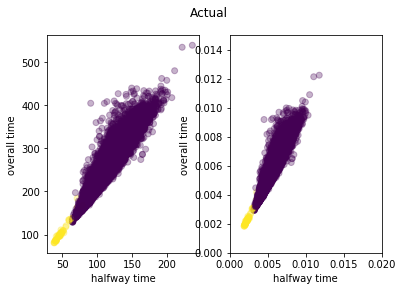

actual            0   1
ms2_bw_0.005           
0             31596  53 



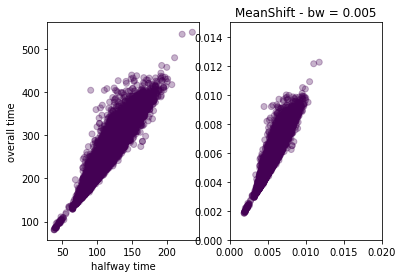

actual            0   1
ms2_bw_0.006           
0             31596  53 



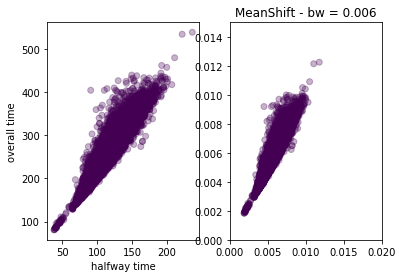

actual            0   1
ms2_bw_0.007           
0             31596  53 



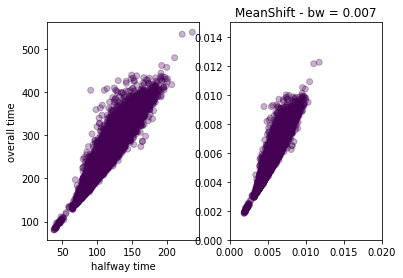

actual            0   1
ms2_bw_0.008           
0             31596  53 



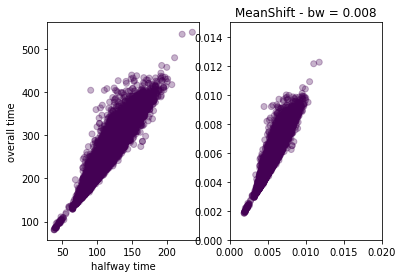

actual                           0   1
ms2_bw_0.009000000000000001           
0                            31596  53 



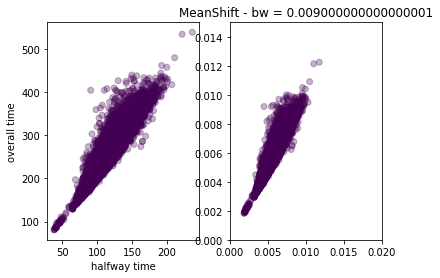

In [73]:
## Using all numeric variables

results4 = pd.DataFrame()
results4['actual'] = bib

plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.scatter(half_official['half'], half_official['official'], c=results4['actual'], alpha=.3)
plt.xlabel('halfway time')
plt.ylabel('overall time')
plt.subplot(1, 2, 2)
plt.scatter(half_off_norm[:, 0], half_off_norm[:, 1], c=results4['actual'], alpha=.3)
plt.xlabel('halfway time')
plt.ylabel('overall time')
plt.xlim([0, 0.02])
plt.ylim([0, 0.015])
plt.suptitle('Actual')
plt.show()

for bw in np.arange(0.005, 0.01, 0.001):
    bib_model = MeanShift(bandwidth = bw, bin_seeding=True).fit(half_off_norm)
    bib_pred = bib_model.predict(half_off_norm)
    results4['ms2_bw_{}'.format(bw)] = bib_pred
    print(pd.crosstab(results4['ms2_bw_{}'.format(bw)], results4['actual']), '\n')
    plt.subplots(1, 2)
    plt.subplot(1, 2, 1)
    plt.scatter(half_official['half'], half_official['official'], c=results4['ms2_bw_{}'.format(bw)], alpha=.3)
    plt.xlabel('halfway time')
    plt.ylabel('overall time')
    plt.subplot(1, 2, 2)
    plt.scatter(half_off_norm[:, 0], half_off_norm[:, 1], c=results4['ms2_bw_{}'.format(bw)], alpha=.3)
    plt.xlim([0, 0.02])
    plt.ylim([0, 0.015])
    plt.title('MeanShift - bw = {}'.format(bw))
    plt.show()


#### MiniBatchKMeans

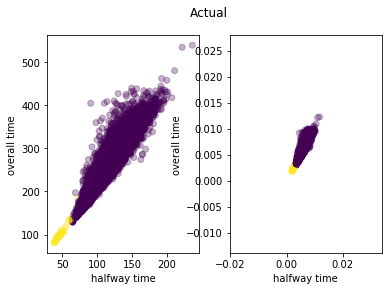

actual            0   1
mbkm_clust_2           
0             22279  53
1              9317   0 



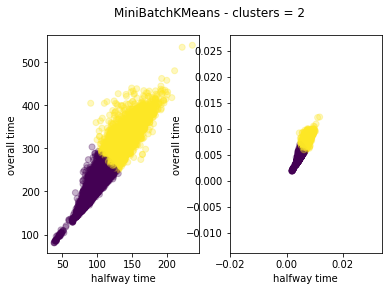

actual            0   1
mbkm_clust_3           
0             12005   0
1             14149  53
2              5442   0 



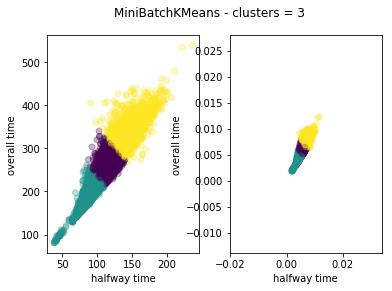

actual            0   1
mbkm_clust_4           
0             11056   0
1              4741   0
2              7649  53
3              8150   0 



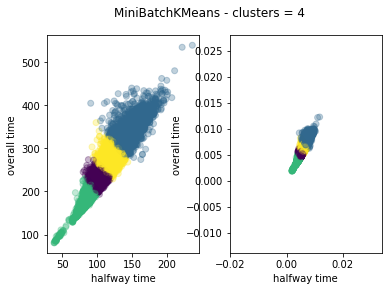

actual            0   1
mbkm_clust_5           
0             10665   0
1              4387   0
2              7531  53
3              7226   0
4              1787   0 



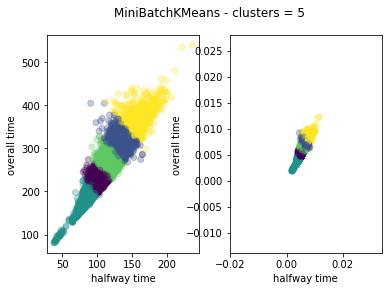

actual            0   1
mbkm_clust_6           
0             10015   0
1              2742   0
2              6963   0
3              1100   0
4              6469  53
5              4307   0 



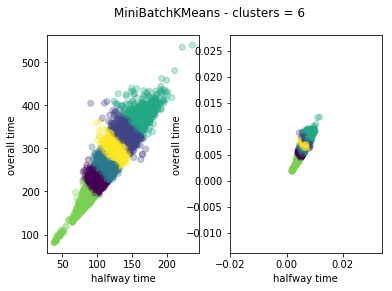

actual           0   1
mbkm_clust_7          
0             2839   0
1             7111   0
2             7023   0
3             3773   0
4             4547  53
5             1388   0
6             4915   0 



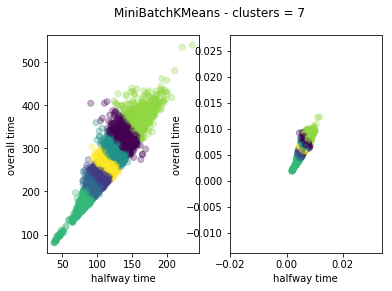

actual           0   1
mbkm_clust_8          
0             6600   0
1             4129   0
2             4388   1
3              981   0
4             5838   0
5             2276   0
6             5658   0
7             1726  52 



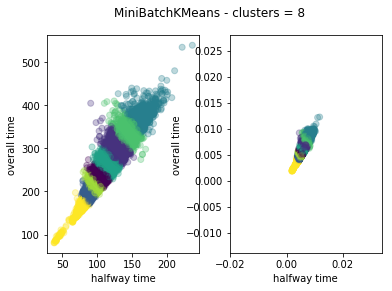

actual           0   1
mbkm_clust_9          
0             3228   0
1             5050   0
2             1399   0
3             3978  53
4             5088   0
5              673   0
6             4094   0
7             2296   0
8             5790   0 



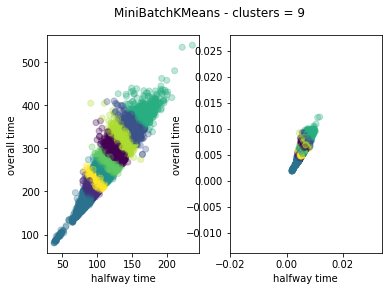

In [28]:
## Using all numeric variables

results5 = pd.DataFrame()
results5['actual'] = bib

fig, ax = plt.subplots(1, 2)
plt.subplot(1, 2, 1)
plt.scatter(half_official['half'], half_official['official'], c=results4['actual'], alpha=.3)
plt.xlabel('halfway time')
plt.ylabel('overall time')
plt.subplot(1, 2, 2)
plt.scatter(half_off_norm[:, 0], half_off_norm[:, 1], c=results4['actual'], alpha=.3)
plt.xlabel('halfway time')
plt.ylabel('overall time')
plt.suptitle('Actual', ha='left', fontsize=15)
plt.tight_layout()
plt.show()

for n_clust in np.arange(2, 10):
    bib_model = MiniBatchKMeans(n_clusters=n_clust, random_state=55).fit(half_off_norm)
    bib_pred = bib_model.predict(half_off_norm)
    results5['mbkm_clust_{}'.format(n_clust)] = bib_pred
    print(pd.crosstab(results5['mbkm_clust_{}'.format(n_clust)], results5['actual']), '\n')
    plt.subplots(1, 2)
    plt.subplot(1, 2, 1)
    plt.scatter(half_official['half'], half_official['official'], c=results5['mbkm_clust_{}'.format(n_clust)], alpha=.3)
    plt.xlabel('halfway time')
    plt.ylabel('overall time')
    plt.subplot(1, 2, 2)
    plt.scatter(half_off_norm[:, 0], half_off_norm[:, 1], c=results5['mbkm_clust_{}'.format(n_clust)], alpha=.3)
    plt.xlabel('halfway time')
    plt.ylabel('overall time')
    plt.suptitle('MiniBatchKMeans - clusters = {}'.format(n_clust))
    plt.show()



#### Spectral Clustering

In [77]:
# Too slow

start_time = time.process_time()

sc = SpectralClustering(n_clusters=2, n_jobs=3)
sc_pred = sc.fit_predict(times_norm)
plt.scatter(times_pca[:, 0], times_pca[:, 1], c=sc_pred)
plt.show()

time.process_time() - start_time

## Affinity prop would also take forever

KeyboardInterrupt: 

## Try clustering into Male / Female

In [30]:
# bm2014 = bm2014[~bm2014.bib.str.startswith('W')]
bm2014_num = bm2014.copy()
bm2014_num.drop(['name', 'division', 'bib', 'genderdiv', 'overall',
                'ctz', 'state', 'country', 'city'], axis=1, inplace=True) ## remove overall because starts again from 1 after wheelchair. totally cocks up the model
bm2014_num.head()


,10k,25k,gender,age,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,M,47,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,F,33,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,M,41,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,F,24,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,M,40,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72


In [31]:
## Drop NAs.

bm2014_num.dropna(inplace=True)
bm2014_num.reset_index(inplace=True, drop=True)

In [32]:
## Separate outcome
y = bm2014_num['gender']
x = bm2014_num.drop(['gender'], axis=1)

In [33]:
y = y.to_frame()

In [34]:
y['gender'].unique()

array(['M', 'F'], dtype=object)

In [35]:
y['gender'] = np.where(y['gender'] == 'M', 1, 0)

In [36]:
xnorm = normalize(x)

In [37]:
pca = PCA(n_components=10)
xpca = pca.fit_transform(xnorm)

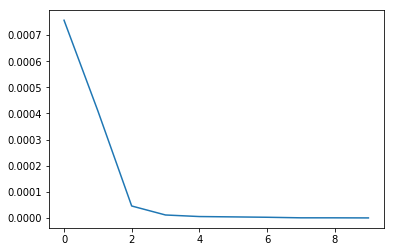

In [38]:
plt.plot(pca.explained_variance_)
plt.show()

In [39]:
pca = PCA(n_components = 2)
xpca = pca.fit_transform(xnorm)

In [40]:
## Split data into four so can check for consistency
## Split PCA into corresponding splits so can plot visualizations

xhalf1, xhalf2, xpcahalf1, xpcahalf2, yhalf1, yhalf2 = train_test_split(xnorm, xpca, y,
                                                 test_size=0.5,
                                                 random_state=55)
x1, x2, xpca1, xpca2, y1, y2 = train_test_split(xhalf1, xpcahalf1, yhalf1,
                                 test_size=0.5, 
                                 random_state=55)
x3, x4, xpca3, xpca4, y3, y4 = train_test_split(xhalf2, xpcahalf2, yhalf2,
                                 test_size=0.5, 
                                 random_state=55)


In [41]:
print(len(x1), len(x2), len(x3), len(x4))

7912 7912 7912 7913


In [42]:
x4 = x4[:-1]
xpca4 = xpca4[:-1]
y4 = y4[:-1]

### KMeans

In [43]:
ypred = pd.DataFrame()

for counter, data in enumerate([
    (x1, xpca1),
    (x2, xpca2),
    (x3, xpca3),
    (x4, xpca4)
]):
    ypred['pca_1_sample_' + str(counter)] = data[1][:, 0]
    ypred['pca_2_sample_' + str(counter)] = data[1][:, 1]
    
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=55).fit_predict(data[0])
        ypred['clust_' + str(nclust) + '_sample_' + str(counter)] = pred

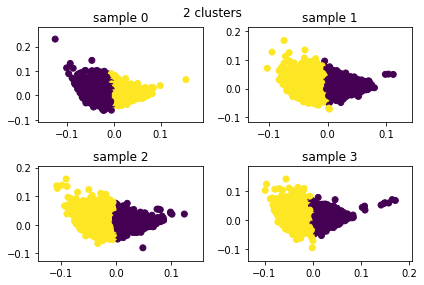

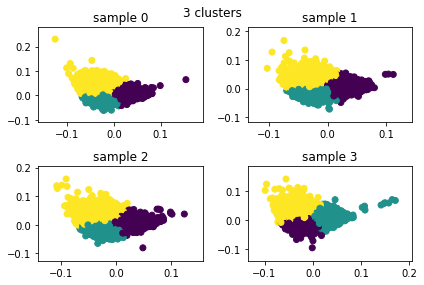

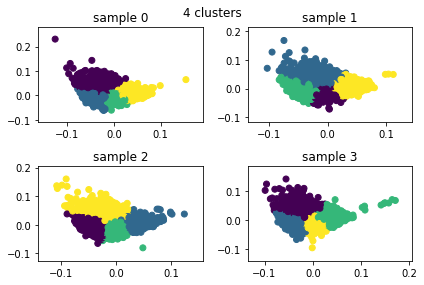

In [44]:
for cluster in range(2, 5):
    f, axarr = plt.subplots(2, 2)
    for i in range(4):
        x_sub = ypred['pca_1_sample_{}'.format(i)]
        y_sub = ypred['pca_2_sample_{}'.format(i)]
        c = ypred['clust_{}_sample_{}'.format(cluster, i)]
        
        rows = int(np.floor(i / 2))
        cols = i % 2
        axarr[rows, cols].scatter(x_sub, y_sub, c=c)
        axarr[rows, cols].set_title('sample {}'.format(i))
       # axarr[rows, cols].set_ylim([-.2, .2])
       # axarr[rows, cols].set_xlim([-.1, 1.5])
        
    plt.suptitle('{} clusters'.format(cluster))
    plt.tight_layout()
    plt.show()

In [45]:
## All number of clusters result in fairly consistent groupings

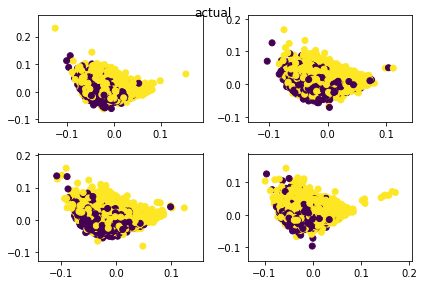

In [46]:
ys = pd.DataFrame()
ys['y0'] = y1['gender'].values
ys['y1'] = y2['gender'].values
ys['y2'] = y3['gender'].values
ys['y3'] = y4['gender'].values

f, axarr = plt.subplots(2, 2)
for i in range(4):
    x_sub = ypred['pca_1_sample_{}'.format(i)]
    y_sub = ypred['pca_2_sample_{}'.format(i)]
    c = ys['y{}'.format(i)]

    rows = int(np.floor(i / 2))
    cols = i % 2
    axarr[rows, cols].scatter(x_sub, y_sub, c=c)
   # axarr[rows, cols].set_ylim([-.2, .2])
   # axarr[rows, cols].set_xlim([-.1, 1.5])

plt.suptitle('actual')
plt.tight_layout()
plt.show()

In [47]:
ypred.head()

,pca_1_sample_0,pca_2_sample_0,clust_2_sample_0,clust_3_sample_0,clust_4_sample_0,pca_1_sample_1,pca_2_sample_1,clust_2_sample_1,clust_3_sample_1,clust_4_sample_1,pca_1_sample_2,pca_2_sample_2,clust_2_sample_2,clust_3_sample_2,clust_4_sample_2,pca_1_sample_3,pca_2_sample_3,clust_2_sample_3,clust_3_sample_3,clust_4_sample_3
0,0.026136,0.016085,1,0,3,0.023740,0.004403,0,0,3,-0.007136,0.003892,1,1,2,-0.005024,-0.007013,1,0,3
1,0.043715,0.004766,1,0,3,0.022842,-0.008569,0,0,3,-0.065094,0.010578,1,2,0,0.030961,0.008413,0,1,2
2,-0.002553,0.040570,1,2,0,0.027968,-0.013927,0,0,3,0.010856,0.018006,0,0,1,0.033935,-0.002425,0,1,2
3,-0.005355,-0.029409,0,1,2,0.020150,0.005640,0,0,3,-0.014773,0.003919,1,1,0,-0.046920,-0.020353,1,0,1
4,-0.006027,-0.034168,0,1,2,0.001768,-0.017793,0,1,0,0.002397,0.017227,0,0,3,0.003130,-0.001846,0,1,3


In [48]:
ypred_sample0 = ypred.iloc[:, :5]
ypred_sample0['sample'] = 0
ypred_sample0['actual'] = y1['gender'].values
ypred_sample1 = ypred.iloc[:, 5:10]
ypred_sample1['sample'] = 1
ypred_sample1['actual'] = y2['gender'].values
ypred_sample2 = ypred.iloc[:, 10:15]
ypred_sample2['sample'] = 2
ypred_sample2['actual'] = y3['gender'].values
ypred_sample3 = ypred.iloc[:, 15:]
ypred_sample3['sample'] = 3
ypred_sample3['actual'] = y4['gender'].values

cols = ['pca1', 'pca2', 'clust2', 'clust3', 'clust4', 'sample', 'actual']

ypred_sample0.columns = cols
ypred_sample1.columns = cols
ypred_sample2.columns = cols
ypred_sample3.columns = cols

ypred_long = pd.concat([ypred_sample0, 
                        ypred_sample1, 
                        ypred_sample2, 
                        ypred_sample3],
                        axis=0)

ypred_long.reset_index(inplace=True, drop=True)
ypred_long.head()

,pca1,pca2,clust2,clust3,clust4,sample,actual
0,0.026136,0.016085,1,0,3,0,1
1,0.043715,0.004766,1,0,3,0,0
2,-0.002553,0.040570,1,2,0,0,1
3,-0.005355,-0.029409,0,1,2,0,1
4,-0.006027,-0.034168,0,1,2,0,1


In [49]:
pd.crosstab(ypred_long['clust2'], ypred_long['actual'])

actual,0,1
clust2,,
0,6525,10059
1,7639,7425


In [50]:
pd.crosstab(ypred_long['clust3'], ypred_long['actual'])

actual,0,1
clust3,,
0,5452,8415
1,6613,5374
2,2099,3695


In [51]:
pd.crosstab(ypred_long['clust4'], ypred_long['actual'])

actual,0,1
clust4,,
0,3393,3246
1,3270,3885
2,4591,4546
3,2910,5807


In [52]:
adjusted_rand_score(ypred_long['clust2'], ypred_long['actual'])

0.013969347600666364

In [53]:
for sample in [x1, x2, x3, x4]:
    model = KMeans(n_clusters=2, random_state=55).fit(sample)
    labels = model.labels_
    print(silhouette_score(sample, labels, metric='euclidean'))

0.37908999844502067
0.37178298189244113
0.37864086509674805
0.37368746498519206


### Simplify - just look at whole dataset

In [54]:
x.head()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,47,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,33,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,41,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,24,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,40,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72


In [55]:
y.head()

,gender
0,1
1,0
2,1
3,0
4,1


In [56]:
all_x_pred = KMeans(n_clusters = 2).fit_predict(xnorm)
pd.crosstab(all_x_pred, y['gender'])

gender,0,1
row_0,,
0,5855,11374
1,8310,6110


In [57]:
pca_all = PCA(n_components=2)
xpca_all = pca_all.fit_transform(xnorm)

In [58]:
pca_all.explained_variance_

array([0.00075694, 0.00040997])

In [59]:
xpca_all[:, 0]

array([ 0.16417815,  0.03476042,  0.14736004, ..., -0.0498592 ,
       -0.02771818,  0.03470505])

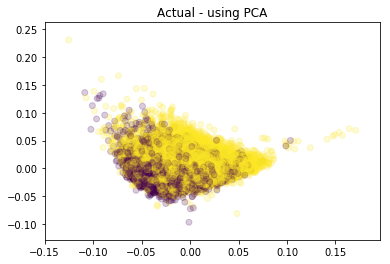

In [60]:
plt.scatter(xpca_all[:, 0], xpca_all[:, 1], c=y['gender'], alpha=.2)
plt.title('Actual - using PCA')
plt.show()

## Try grouping ages then predicting them

In [61]:
bm2014.age.describe()

count    31984.000000
mean        42.407079
std         11.316496
min         18.000000
25%         33.000000
50%         42.000000
75%         50.000000
max         81.000000
Name: age, dtype: float64

In [62]:
# bm2014['age_group'] = np.nan

# for row in np.arange(0, len(bm2014)):
#     if (bm2014.iloc[row, 'age_group'].isnull()):
#         if (bm2014.iloc[row, 'age'] < 21):
#             bm2014['age_group'] = 'under_21'
#             elif (bm2014.iloc[row, 'age'] < 31):
#                 bm2014['age_group'] = '21_to_30'
#                 elif (bm2014.iloc[row, 'age'] < 41):
#                     bm2014.iloc[row, 'age_group'] = '31_to_40'
#                     elif (bm2014.iloc[row, 'age'] < 51):
#                         bm2014.iloc[row, 'age_group'] = '41_to_50'

#bm2014['age_group'] = np.where(bm2014['age'] < 21, 'under_21', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 31) & (np.isnan(bm2014['age_group'])), '21_to_30', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 41) & (np.isnan(bm2014['age_group'])), '31_to_40', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 51) & (np.isnan(bm2014['age_group'])), '41_to_50', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] < 61) & (np.isnan(bm2014['age_group'])), '51_to_60', bm2014['age_group'])
#bm2014['age_group'] = np.where((bm2014['age'] > 60) & (np.isnan(bm2014['age_group'])), 'over_60', bm2014['age_group'])

## Try predicting overall from times up to halfway

In [63]:
bm2014_num.head()

,10k,25k,gender,age,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,M,47,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,F,33,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,M,41,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,F,24,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,M,40,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72


In [64]:
x.head()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,40k
0,17.37,47.67,47,85.25,71.40,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,82.43,33,138.95,116.37,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,45.80,41,80.60,67.42,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,82.43,24,140.58,116.37,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,46.37,40,81.23,67.83,3.10,57.03,8.02,38.60,36.58,76.72


In [65]:
pca2 = PCA(n_components=2)
xn_pca = pca2.fit_transform(xnorm)

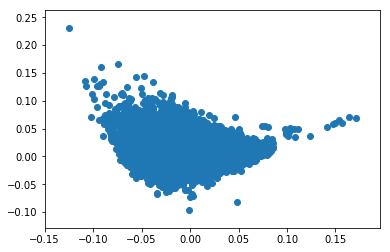

In [66]:
plt.scatter(xn_pca[:, 0], xn_pca[:, 1])
# plt.show()

In [67]:
pace = x['pace'].values
half = x['half'].values

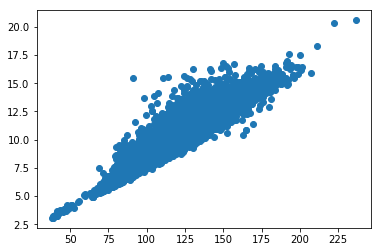

In [68]:
plt.scatter(half, pace)

In [69]:
bm2014_num.dtypes

10k         float64
25k         float64
gender       object
age           int64
official    float64
35k         float64
pace        float64
30k         float64
5k          float64
half        float64
20k         float64
40k         float64
dtype: object

In [70]:
float_these_cunts = ['10k', '25k', '35k', '']
bm2014_num[['10k', '25k']].astype(np.float32)

,10k,25k
0,17.370001,47.669998
1,32.580002,82.430000
2,16.620001,45.799999
3,32.570000,82.430000
4,17.120001,46.369999
5,32.580002,82.449997
6,17.650000,47.669998
7,30.480000,76.949997
8,17.120001,46.369999
9,30.480000,77.680000


In [71]:
c

0       0
1       0
2       1
3       0
4       0
5       0
6       1
7       1
8       0
9       0
10      1
11      0
12      1
13      0
14      0
15      1
16      0
17      1
18      1
19      1
20      1
21      0
22      0
23      0
24      1
25      1
26      1
27      1
28      0
29      0
       ..
7882    0
7883    0
7884    1
7885    0
7886    1
7887    0
7888    1
7889    0
7890    0
7891    0
7892    1
7893    1
7894    1
7895    1
7896    1
7897    1
7898    1
7899    0
7900    0
7901    1
7902    1
7903    0
7904    0
7905    1
7906    1
7907    1
7908    1
7909    1
7910    0
7911    1
Name: y3, Length: 7912, dtype: int64